# This file performs EDA. Data first needs to be collected and cleaned in "pushshift_func.ipynb" and "comment_cleaning.ipynb"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scattertext as st
import spacy

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df_comment = pd.read_csv('../data/comment_clean.csv')

In [3]:
# splitting subreddits into separate dataframes for analysis and visualizations
iaf = df_comment[df_comment['subreddit'] == 1]
mildly = df_comment[df_comment['subreddit'] == 0]

In [4]:
# switching subreddits back to names from 1's and 0's for analysis and visualizations
df_comment['subreddit'] = df_comment['subreddit'].map({1:'interestingasfuck', 0:'mildlyinteresting'})

In [5]:
df_comment.groupby(by='subreddit').mean()

,num_of_chars,word_count,capital_count,question_mark,exclaimation,dot_dot_dot,quotes,italics,bold,polarity,subjectivity,avg_word_length,stop_word_count
subreddit,,,,,,,,,,,,,
interestingasfuck,99.695577,18.131425,2.854570,0.157369,0.088714,0.040265,0.038978,0.017380,0.002236,0.054197,0.341892,4.522874,8.804666
mildlyinteresting,96.420917,18.038820,2.920236,0.154789,0.106872,0.039818,0.036532,0.015978,0.001816,0.074230,0.350891,4.433700,8.877167


*Interpretation: The average values for the engineered features did not change much from subreddit to subreddit. This is just a small look at what is going on, but it doesn't seem like any of these will be useful in making predictions.*

In [6]:
#  https://github.com/JasonKessler/scattertext
#  Some code taken from above


# This section of code generates an interactive scattertext plot and saves it to an html file.

nlp = spacy.load('en_core_web_sm')

corpus = st.CorpusFromPandas(
    df_comment, 
    category_col='subreddit', 
    text_col='body', 
    nlp=nlp
).build()

html = st.produce_scattertext_explorer(
    corpus,
    category='interestingasfuck', 
    category_name='interestingasfuck', 
    not_category_name='mildlyinteresting',
    width_in_pixels=1000,
)

open('./subreddits.html', 'w', encoding='utf-8').write(html)

To view the snapshot of this scatterplot, the image is in the images folder with the name 'scattertext_reddit.png'

*Interpretation: In the scattertext visualization, the cluster in the top right is showing there are a lot of words that frequently show up in both subreddits. If there were more dense clusters in the top left or bottom right, that would represent words that were used frequently in one subreddit, and not the other. If that were the case, I believe that would help my model in making predictions.* 

In [6]:
# this section of code uses CountVectorizer to get the count of each word in the interestingasfuck subreedit and saves the results to a dataframe
cvect1 = CountVectorizer(stop_words='english')
cvect_transformed1 = cvect1.fit_transform(iaf['body'])

df_words_iaf = pd.DataFrame(cvect_transformed1.A, columns=cvect1.get_feature_names_out())

top_10_iaf = pd.DataFrame(df_words_iaf.sum().sort_values(ascending=False).head(10), columns=['count'])
top_10_iaf.sort_values(by='count', inplace=True)
top_10_iaf

,count
looks,1159
right,1186
make,1230
good,1274
way,1346
really,1391
time,1600
know,1862
think,1991
people,3493


In [7]:
# this section of code uses CountVectorizer to get the count of each word in the mildlyinteresting subreddit and saves the results to a dataframe
cvect2 = CountVectorizer(stop_words='english')
cvect_transformed2 = cvect2.fit_transform(mildly['body'])

df_words_mildly = pd.DataFrame(cvect_transformed2.A, columns=cvect2.get_feature_names_out())

top_10_mildly = pd.DataFrame(df_words_mildly.sum().sort_values(ascending=False).head(10), columns=['count'])
top_10_mildly.sort_values(by='count', inplace=True)
top_10_mildly

,count
thing,1347
looks,1415
right,1498
years,1516
really,1615
good,1662
time,1942
think,1973
know,2043
people,2813


In [8]:
# color list for interestingasfuck, used for transforming the graphs
color_list_iaf = []

for word in list(top_10_iaf.index):
    if word in list(top_10_mildly.index):
        color_list_iaf.append('green')
    else:
        color_list_iaf.append('blue')

In [9]:
# color list for mildlyinteresting, used for transforming the graphs
color_list_mildly = []

for word in list(top_10_mildly.index):
    if word in list(top_10_iaf.index):
        color_list_mildly.append('green')
    else:
        color_list_mildly.append('blue')

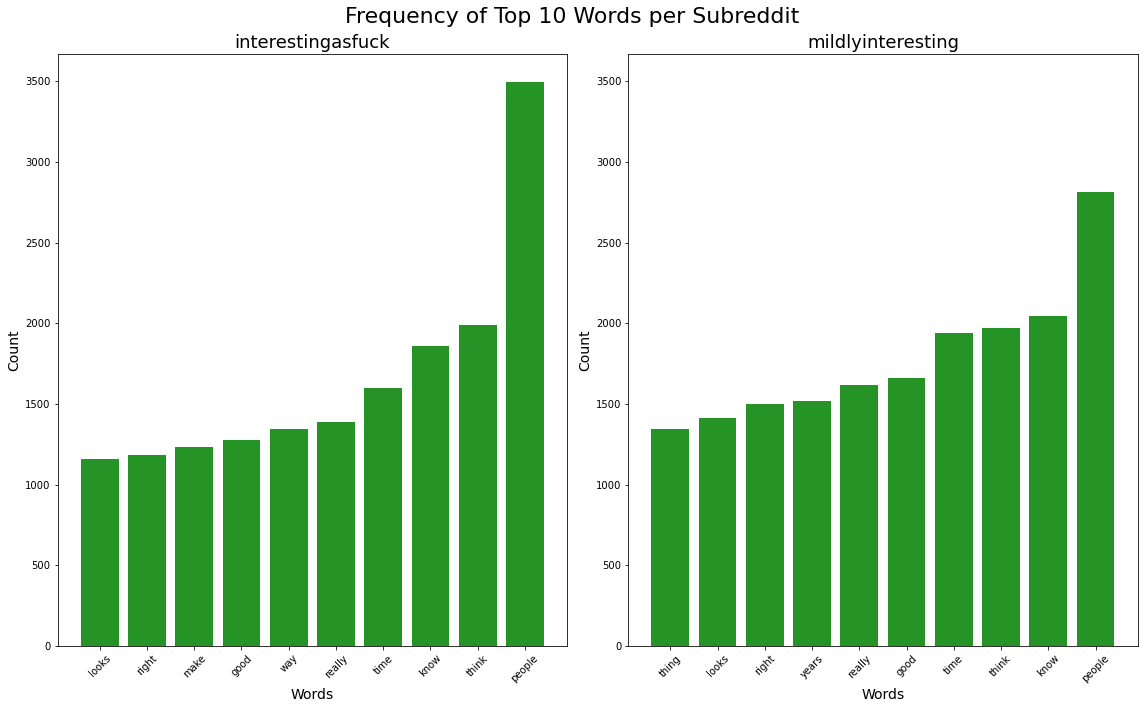

In [10]:
plt.figure(figsize=(16,10))
plt.suptitle('Frequency of Top 10 Words per Subreddit', fontsize=22)

ax1 = plt.subplot(1, 2, 1)
plt.bar(
    x=top_10_iaf.index,
    height=top_10_iaf['count'],
    color='green',
    alpha=.85
)
plt.xticks(rotation=45)
ax1.set_title('interestingasfuck', fontsize=18)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)


ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.bar(
    x=top_10_mildly.index,
    height=top_10_mildly['count'],
    color='green',
    alpha=.85
)
plt.xticks(rotation=45)
ax2.set_title('mildlyinteresting', fontsize=18)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()

plt.savefig('../images/top_words.png');

See interpretation in the next graph (same graph, different colors)

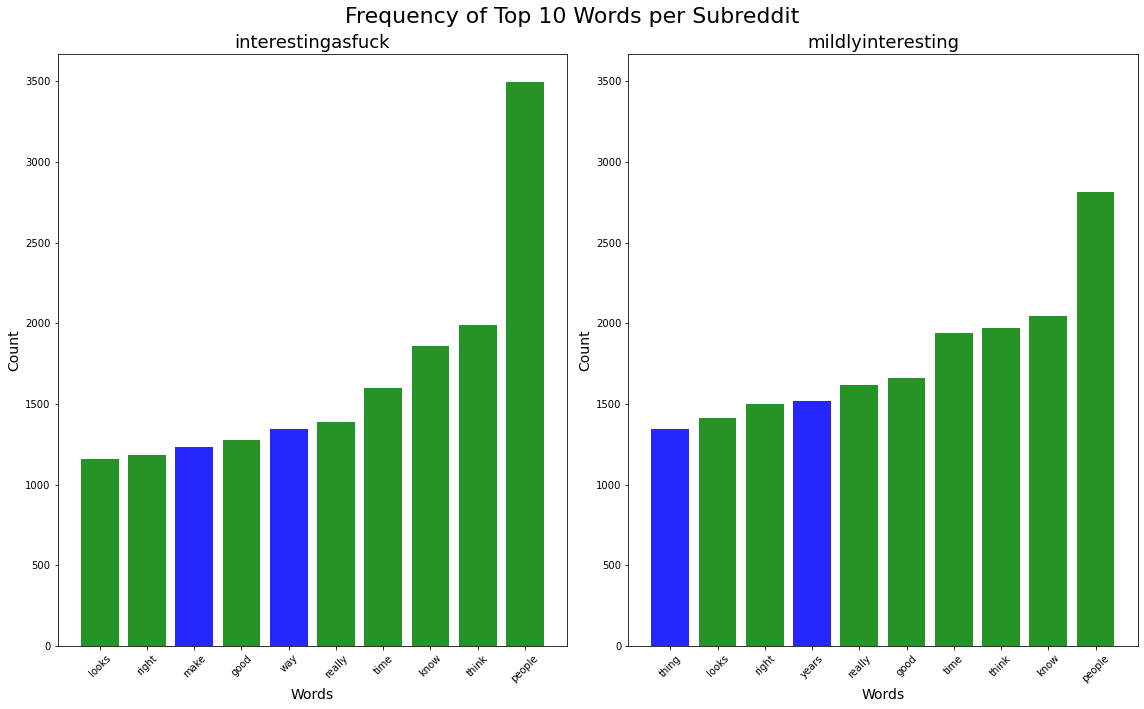

In [11]:
plt.figure(figsize=(16,10))
plt.suptitle('Frequency of Top 10 Words per Subreddit', fontsize=22)

ax1 = plt.subplot(1, 2, 1)
plt.bar(
    x=top_10_iaf.index,
    height=top_10_iaf['count'],
    color=color_list_iaf,
    alpha=.85
)
plt.xticks(rotation=45)
ax1.set_title('interestingasfuck', fontsize=18)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.bar(
    x=top_10_mildly.index,
    height=top_10_mildly['count'],
    color=color_list_mildly,
    alpha=.85
)
plt.xticks(rotation=45)
ax2.set_title('mildlyinteresting', fontsize=18)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()

plt.savefig('../images/top_words_overlay.png');

*Interpretation: These graphs display the frequency of the top 10 words for each subreddit. Many stop words were taken out at this point. The words in green show up in the other subreddits top 10. The words in blue do not. Most of these words are commonly used, so not too surprising.*

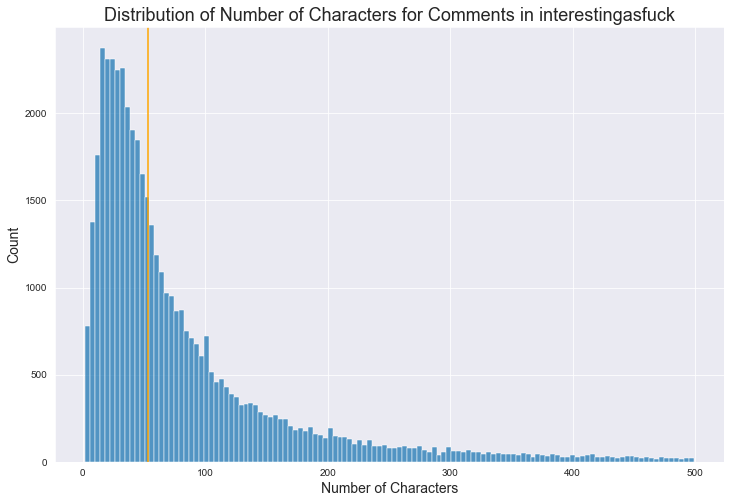

In [17]:
iaf_word_count = iaf[iaf['num_of_chars'] < 500]

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

sns.histplot(iaf_word_count['num_of_chars'])
plt.axvline(iaf['num_of_chars'].median(), color='orange')

plt.title('Distribution of Number of Characters for Comments in interestingasfuck', fontsize=18)
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.savefig('../images/hist_iaf.png');

*Interpretation: This graph is a distribution of the number of characters for the interestingasfuck subreddit. A significant ammount of comments are below the median of 53 characters. These comments generated a lot of noise in the model, but they make up a large portion of the dataset.*

In [18]:
iaf['num_of_chars'].median()

53.0

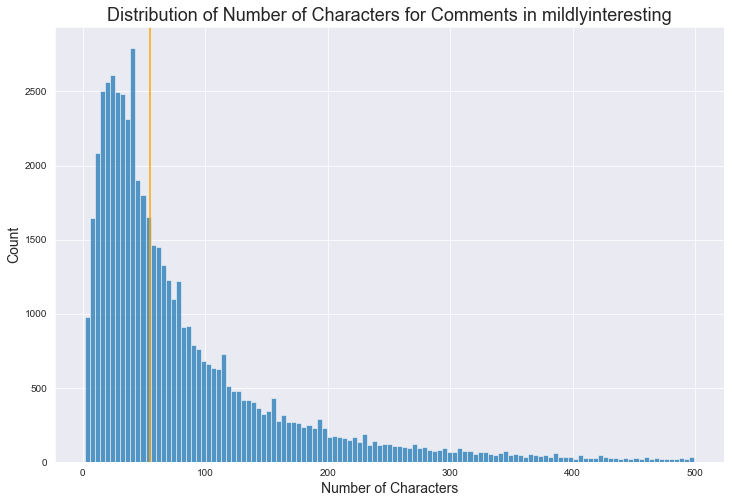

In [19]:
mildly_word_count = mildly[mildly['num_of_chars'] < 500]

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

sns.histplot(mildly_word_count['num_of_chars'])
plt.axvline(mildly['num_of_chars'].median(), color='orange')

plt.title('Distribution of Number of Characters for Comments in mildlyinteresting', fontsize=18)
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.savefig('../images/hist_mildly.png');

*Interpretation: This graph is a distribution of the number of characters for the mildlyinteresting subreddit. A significant ammount of comments are below the median of 55 characters. These comments generated a lot of noise in the model, but they make up a large portion of the dataset.*

In [20]:
mildly['num_of_chars'].median()

55.0

In [21]:
# read in the coefficient data
df_coef = pd.read_csv('../data/logisticregression_coefs.csv')
df_coef.sort_values(by='coef', ascending=False, inplace=True)

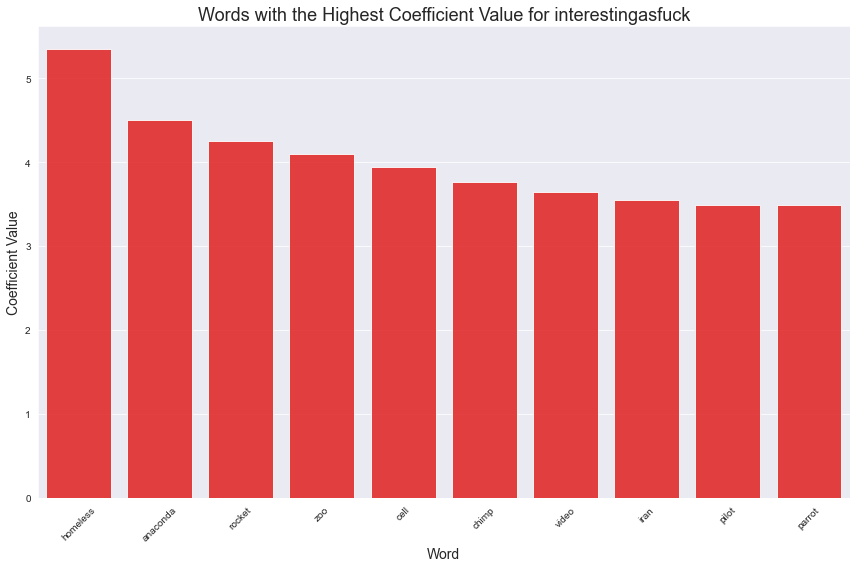

In [67]:
plt.figure(figsize=(12,8))

sns.barplot(
    data=df_coef.head(10), 
    # orient='h', 
    x='word', 
    y='coef', 
    color='Red', 
    alpha=.85
)
plt.xticks(rotation=45)
plt.title('Words with the Highest Coefficient Value for interestingasfuck', fontsize=18)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Coefficient Value', fontsize=14)

plt.tight_layout()

plt.savefig('../images/iaf_coefs.png');

*Interpretation: Here is a look at the ten words with the highest coefficient values for interestingasfuck. These words were the strongest predictors for this subreddit. Something interesting is that they are almost all nouns. A deeper look into the affect nouns have on the model would be the next step.*

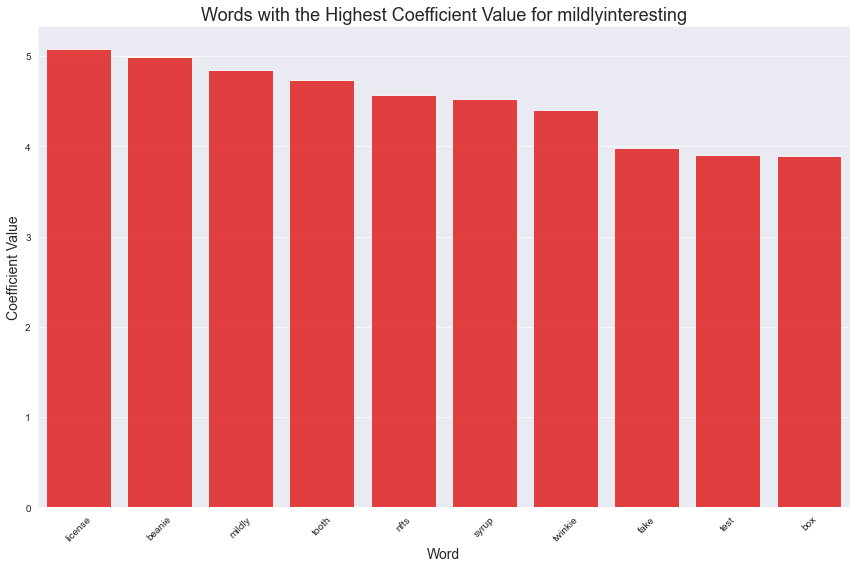

In [68]:
# creates a new dataframe of the tail of the coefficients. Takes the absolute value to turn the negatives to positives,
# and sorts the values to make it easier to visualize what is going on.
df_coef_tail = df_coef.tail(10)
df_coef_tail['coef'] = np.abs(df_coef_tail['coef'])
df_coef_tail.sort_values(by='coef', ascending=False, inplace=True)


plt.figure(figsize=(12,8))

sns.barplot(
    data=df_coef_tail, 
    # orient='h', 
    x='word', 
    y='coef', 
    color='Red', 
    alpha=.85
)
plt.xticks(rotation=45)
plt.title('Words with the Highest Coefficient Value for mildlyinteresting', fontsize=18)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Coefficient Value', fontsize=14)

plt.tight_layout()

plt.savefig('../images/mildly_coefs.png');

*Interpretation: Here is a look at the ten words with the highest coefficient values for mildlyinteresting. These words were the strongest predictors for this subreddit. Something interesting is that they are almost all nouns. A deeper look into the affect nouns have on the model would be the next step.*